In [1]:
from google.colab import files
files.upload() # kaggle.jsonをアップロード
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 1.2MB 17.5MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=3ed8664cacfddb2a8e129e9c6468b98bc7d21090d9e4409613f321ec72d4db92
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=8af1ceac8e3add95dd1a0d8c8d024443f9f4dead603fdc4c2e0d50b15603e94d
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent
  0% 0.00/27.0k [00:00<?, ?B/s]
100% 27.0k/27.0k [00:00<00:00, 23.7MB/s]
Archive:  emotions-sensor-data-set.zip
  inflating: Andbrain_DataSet.csv    

----TSNE-----
           1          2
0  19.586975   1.667174
1 -56.570698  18.201120
2 -29.010466 -16.374472
3  -1.418561  28.715313
4 -13.877794  -7.042311


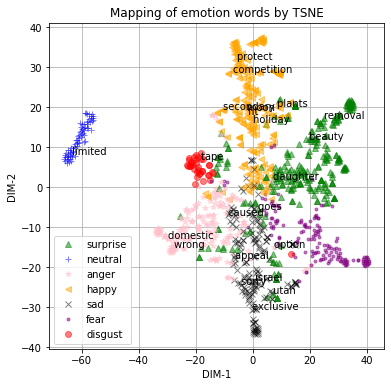


----UMAP-----
           1         2
0  10.645348  6.449574
1  -6.923045  3.159939
2   5.371478  4.497163
3  14.339719  2.427750
4   7.757713  5.680897


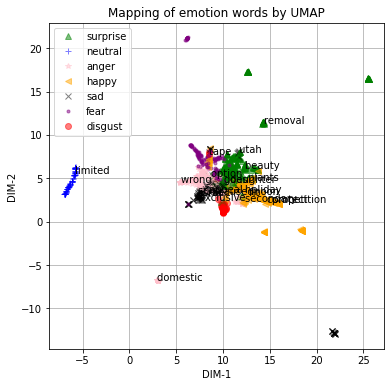

In [2]:
import numpy as np
import pandas as pd
# t-SNEのクラスをインポート
from sklearn.manifold import TSNE
# 可視化用にインポート
import matplotlib.pyplot as plt
%matplotlib inline
# UMAPクラスを使用するためのライブラリをインポート
!pip install umap-learn
import umap

# データの準備
def prepare():
    # 英単語の感情ごとの確率値を登録した
    # データセットを読み込む
    !kaggle datasets download -d \
    iwilldoit/emotions-sensor-data-set
    !unzip emotions-sensor-data-set.zip
    features = ['disgust', 'surprise', 
                'neutral', 'anger',
                'sad', 'happy', 'fear']
    df = pd.read_csv('Andbrain_DataSet.csv')
    words = df.loc[:, ['word']].values
    emotions = df.loc[:, features].values
    lbs = []
    for i in range(len(emotions)):
        val = np.max(emotions[i])
        id = list(emotions[i]).index(val)
        lbs.append(id)
    return words, emotions, features, lbs


# t-SNE, UMAPによる次元削減と可視化
def graph_Embedding(emb, emotions, words, features, lbs):
    print('\n----{}-----'.format(emb.__class__.__name__))
    df = pd.DataFrame(emotions, columns=features)
    emb.fit(df)
    fspace = emb.fit_transform(df)
    ndf = pd.DataFrame(fspace, columns=['1', '2'])
    print(ndf.head())
    plt.figure(figsize=(6,6)) 
    n = 0
    col = ['red', 'green', 'blue', 
           'pink', 'black', 'orange', 'purple']
    mks = ['o', '^', '+', '*', 'x', '<', '.']
    chk = [0] * len(features)
    for (dim1,dim2,word,l) in zip(
              fspace[:,0], fspace[:,1], words,lbs):
        if chk[l] == 0:
            plt.plot(dim1,dim2,'x',alpha=0.5, c=col[l],
                     marker=mks[l], label=features[l])
        else:
            plt.plot(dim1,dim2,'x',alpha=0.5, c=col[l],
                     marker=mks[l])
        chk[l] += 1
        n += 1
        if n % 50 == 0:
            plt.annotate(word[0], xy=(dim1, dim2))
    plt.grid()
    plt.xlabel('DIM-1')
    plt.ylabel('DIM-2')
    plt.legend()
    plt.title('Mapping of emotion words by {}'.format(
               emb.__class__.__name__))
    plt.savefig('{}.png'.format(emb.__class__.__name__),\
                dpi=400)
    plt.show()

def main():
    words, emotions, features, lbs = prepare()
    for emb in [TSNE(n_components=2, random_state=0),
                umap.UMAP(n_components=2, random_state=0)]:
        graph_Embedding(emb, emotions, words, features, lbs)

if __name__ == '__main__':
    main()
    